In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats

In [44]:
auspop_df=pd.read_csv("Resources/AUSPOP.csv")
dfwpop_df=pd.read_csv("Resources/DFWPOP.csv")
elppop_df=pd.read_csv("Resources/ELPPOP.csv")
htnpop_df=pd.read_csv("Resources/HTNPOP.csv")
mclpop_df=pd.read_csv("Resources/MCLPOP.csv")
satpop_df=pd.read_csv("Resources/SATPOP.csv")

In [45]:
population_df = pd.merge(auspop_df,dfwpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,elppop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,htnpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,mclpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,satpop_df, on="DATE",how="outer")

population_df['DATE']=pd.to_datetime(population_df['DATE'],infer_datetime_format=True)

population_df.head()

,DATE,AUSPOP,DFWPOP,ELPPOP,HTNPOP,MCLPOP,SATPOP
0,2000-01-01,1265.715,5196.188,680.942,4739.414,573.398,1719.262
1,2001-01-01,1324.426,5354.623,684.780,4851.189,588.533,1743.796
2,2002-01-01,1353.176,5476.578,688.771,4978.638,607.449,1777.397
3,2003-01-01,1382.693,5582.033,694.672,5084.017,627.164,1808.267
4,2004-01-01,1418.999,5689.982,702.433,5190.444,646.523,1843.927


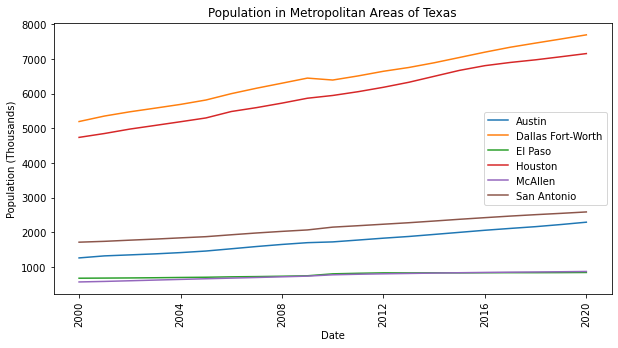

In [46]:
plt.figure(figsize=(10,5))
plt.plot(population_df['DATE'],population_df['AUSPOP'],label='Austin')
plt.plot(population_df['DATE'],population_df['DFWPOP'],label='Dallas Fort-Worth')
plt.plot(population_df['DATE'],population_df['ELPPOP'],label='El Paso')
plt.plot(population_df['DATE'],population_df['HTNPOP'],label='Houston')
plt.plot(population_df['DATE'],population_df['MCLPOP'],label='McAllen')
plt.plot(population_df['DATE'],population_df['SATPOP'],label='San Antonio')

plt.legend(loc='best')

plt.title("Population in Metropolitan Areas of Texas")
plt.xlabel("Date")
plt.ylabel("Population (Thousands)")

plt.xticks(rotation="vertical")
plt.savefig('Results/MetroPopulation.png')
plt.show()

In [47]:
listings_df=pd.read_csv("Resources/metro_listings.csv")
listings_df.set_index('RegionName', inplace=True)
texas_listings_df= listings_df[listings_df['StateName'] == 'TX']
texas_listings_df = texas_listings_df.drop(["RegionID", "SizeRank", "RegionType","StateName"], axis=1)
texas_listings_df
tx_list_df = texas_listings_df.T
tx_list_df.index.name = "DATE"
tx_list_df.reset_index(inplace=True)
tx_list_df['DATE']=pd.to_datetime(tx_list_df['DATE'],infer_datetime_format=True)
tx_list_df.head()

RegionName,DATE,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX"
0,2018-01-31,24283.0,32985.0,11343.0,7955.0,4534.0,2150.0
1,2018-02-28,23203.0,32147.0,11205.0,7577.0,4565.0,2160.0
2,2018-03-31,24345.0,33766.0,11885.0,8158.0,4622.0,2225.0
3,2018-04-30,26749.0,35826.0,12721.0,9160.0,4627.0,2258.0
4,2018-05-31,29538.0,38655.0,13431.0,10295.0,4551.0,2302.0


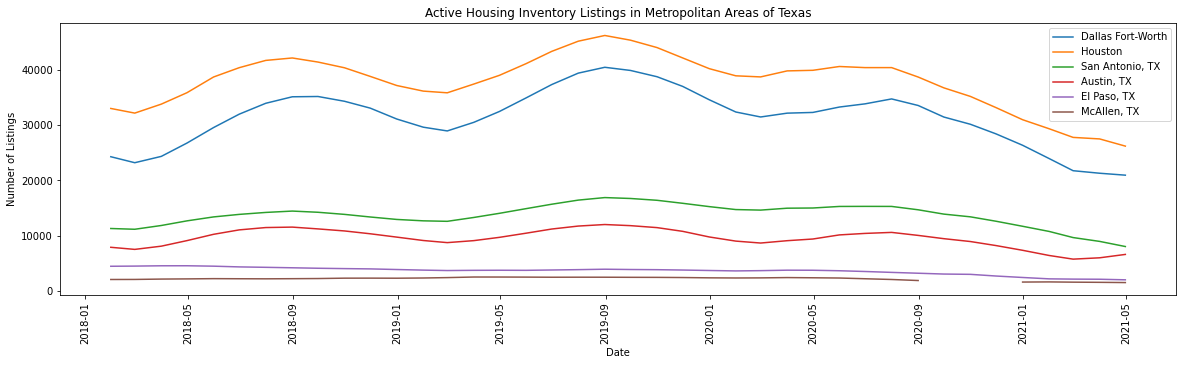

In [48]:
plt.figure(figsize=(20,5))
plt.plot(tx_list_df['DATE'],tx_list_df['Dallas-Fort Worth, TX'],label='Dallas Fort-Worth')
plt.plot(tx_list_df['DATE'],tx_list_df['Houston, TX'],label='Houston')
plt.plot(tx_list_df['DATE'],tx_list_df['San Antonio, TX'],label='San Antonio, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['Austin, TX'],label='Austin, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['El Paso, TX'],label='El Paso, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['McAllen, TX'],label='McAllen, TX')

plt.legend(loc='best')

plt.title("Active Housing Inventory Listings in Metropolitan Areas of Texas")
plt.xlabel("Date")
plt.ylabel("Number of Listings")

plt.xticks(rotation="vertical")
plt.savefig('Results/HistoricalListings.png')
plt.show()

In [49]:
prices_df=pd.read_csv("Resources/metro_median_value.csv")
prices_df.set_index('RegionName', inplace=True)
#prices_df['DATE']=pd.to_datetime(prices_df['DATE'],infer_datetime_format=True)
#prices_df.head()
texas_prices_df= prices_df[prices_df['StateName'] == 'TX']
texas_prices_df = texas_prices_df.drop(["RegionID", "SizeRank", "RegionType","StateName"], axis=1)
tx_prices_df = texas_prices_df.T
tx_prices_df.index.name = "DATE"
tx_prices_df.reset_index(inplace=True)
tx_prices_df['DATE']=pd.to_datetime(tx_prices_df['DATE'],infer_datetime_format=True)
tx_prices_filt_df = tx_prices_df[['DATE','Dallas-Fort Worth, TX','Houston, TX','San Antonio, TX','Austin, TX','El Paso, TX','McAllen, TX']]
tx_prices_filt_df.head()

RegionName,DATE,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX"
0,1996-01-31,112230.0,109810.0,107511.0,170740.0,86922.0,NaN
1,1996-02-29,112293.0,109885.0,107463.0,169874.0,86835.0,NaN
2,1996-03-31,112454.0,109894.0,107415.0,168631.0,86814.0,NaN
3,1996-04-30,112775.0,110042.0,107379.0,166862.0,86784.0,NaN
4,1996-05-31,113120.0,110182.0,107290.0,166396.0,86883.0,NaN


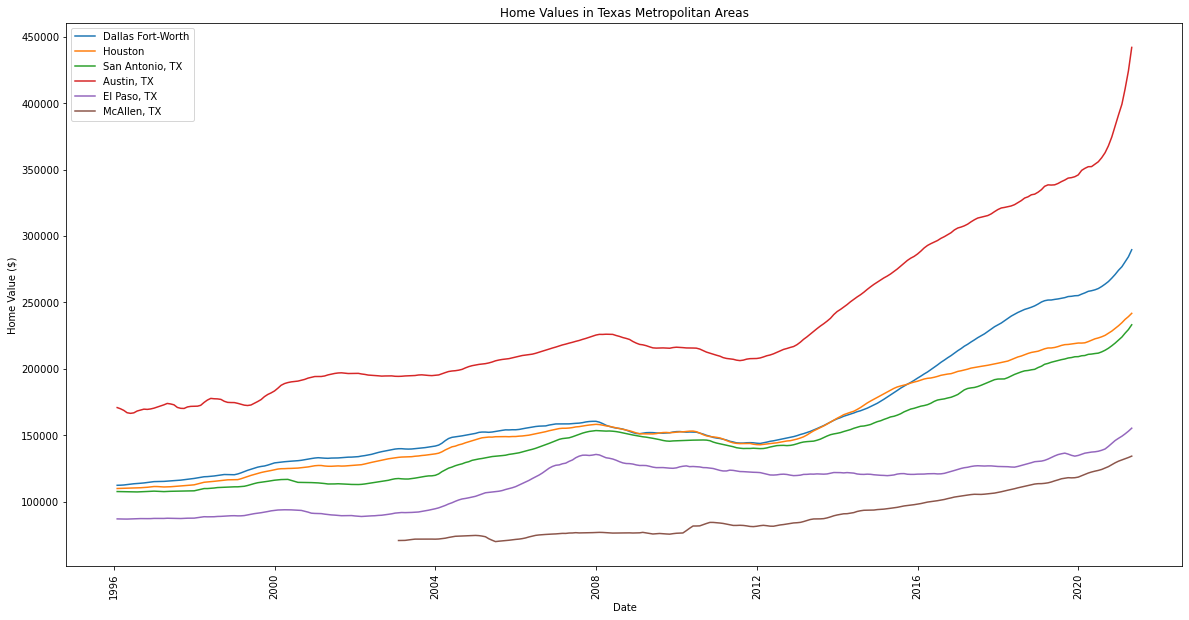

In [50]:
plt.figure(figsize=(20,10))
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Dallas-Fort Worth, TX'],label='Dallas Fort-Worth')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Houston, TX'],label='Houston')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['San Antonio, TX'],label='San Antonio, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Austin, TX'],label='Austin, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['El Paso, TX'],label='El Paso, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['McAllen, TX'],label='McAllen, TX')

plt.legend(loc='best')

plt.title("Home Values in Texas Metropolitan Areas")
plt.xlabel("Date")
plt.ylabel("Home Value ($)")

plt.xticks(rotation="vertical")
plt.savefig('Results/MedianHousingPrice.png')
plt.show()

In [51]:
pricesList_df = pd.merge(tx_list_df,tx_prices_filt_df,on="DATE",how="left")
pricesList_df.head()

RegionName,DATE,"Dallas-Fort Worth, TX_x","Houston, TX_x","San Antonio, TX_x","Austin, TX_x","El Paso, TX_x","McAllen, TX_x","Dallas-Fort Worth, TX_y","Houston, TX_y","San Antonio, TX_y","Austin, TX_y","El Paso, TX_y","McAllen, TX_y"
0,2018-01-31,24283.0,32985.0,11343.0,7955.0,4534.0,2150.0,234443.0,204702.0,192247.0,321045.0,126318.0,107376.0
1,2018-02-28,23203.0,32147.0,11205.0,7577.0,4565.0,2160.0,236069.0,205167.0,192314.0,321433.0,126329.0,107953.0
2,2018-03-31,24345.0,33766.0,11885.0,8158.0,4622.0,2225.0,237897.0,205765.0,193275.0,321976.0,126216.0,108529.0
3,2018-04-30,26749.0,35826.0,12721.0,9160.0,4627.0,2258.0,239575.0,206788.0,194442.0,322539.0,125990.0,109086.0
4,2018-05-31,29538.0,38655.0,13431.0,10295.0,4551.0,2302.0,240988.0,207910.0,195716.0,323535.0,125896.0,109649.0


In [52]:
tx_list_df2=tx_prices_filt_df.rename(columns={'DATE':'dateO'})


tx_list_df2['DATE'] = tx_list_df2['dateO'] +  pd.DateOffset(1)
tx_list_df2.head()

RegionName,dateO,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX",DATE
0,1996-01-31,112230.0,109810.0,107511.0,170740.0,86922.0,NaN,1996-02-01
1,1996-02-29,112293.0,109885.0,107463.0,169874.0,86835.0,NaN,1996-03-01
2,1996-03-31,112454.0,109894.0,107415.0,168631.0,86814.0,NaN,1996-04-01
3,1996-04-30,112775.0,110042.0,107379.0,166862.0,86784.0,NaN,1996-05-01
4,1996-05-31,113120.0,110182.0,107290.0,166396.0,86883.0,NaN,1996-06-01


In [53]:
pop_comp_df=pd.merge(population_df,tx_list_df2, on="DATE",how="inner")
pop_comp_df.dropna()
pop_comp_df.head()

,DATE,AUSPOP,DFWPOP,ELPPOP,HTNPOP,MCLPOP,SATPOP,dateO,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX"
0,2000-01-01,1265.715,5196.188,680.942,4739.414,573.398,1719.262,1999-12-31,129076.0,123947.0,116054.0,183251.0,93338.0,NaN
1,2001-01-01,1324.426,5354.623,684.780,4851.189,588.533,1743.796,2000-12-31,132749.0,126936.0,114142.0,194120.0,91038.0,NaN
2,2002-01-01,1353.176,5476.578,688.771,4978.638,607.449,1777.397,2001-12-31,133590.0,127313.0,112824.0,196375.0,89130.0,NaN
3,2003-01-01,1382.693,5582.033,694.672,5084.017,627.164,1808.267,2002-12-31,139515.0,132861.0,117141.0,194303.0,91277.0,NaN
4,2004-01-01,1418.999,5689.982,702.433,5190.444,646.523,1843.927,2003-12-31,141772.0,135887.0,119736.0,195094.0,94558.0,71664.0


In [65]:
aus_df=pop_comp_df[['DATE','AUSPOP','Austin, TX']]
dfw_df=pop_comp_df[['DATE','DFWPOP','Dallas-Fort Worth, TX']]
elp_df=pop_comp_df[['DATE','ELPPOP','El Paso, TX']]
htn_df=pop_comp_df[['DATE','HTNPOP','Houston, TX']]
mcl_df=pop_comp_df[['DATE','MCLPOP','McAllen, TX']]
sat_df=pop_comp_df[['DATE','SATPOP','San Antonio, TX']]

In [ ]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)

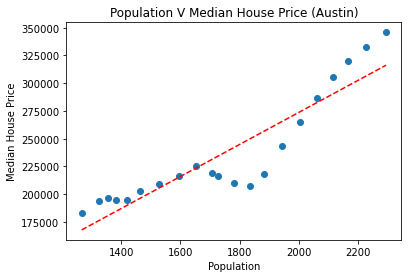

144.18084574657232


In [66]:
#Austin
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['AUSPOP'],pop_comp_df['Austin, TX'])
pri_fit = pri_slope * pop_comp_df['AUSPOP'] + pri_int

plt.scatter(pop_comp_df['AUSPOP'],pop_comp_df['Austin, TX'])
plt.title('Population V Median House Price (Austin)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['AUSPOP'],pri_fit,"--",color="red")
plt.show()
print(pri_slope)

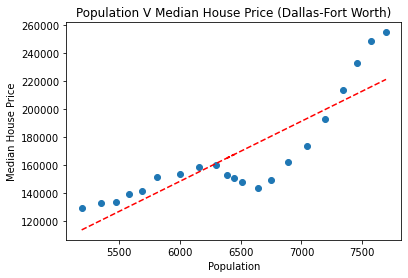

In [64]:
#Dallas FW
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['DFWPOP'],pop_comp_df['Dallas-Fort Worth, TX'])
pri_fit = pri_slope * pop_comp_df['DFWPOP'] + pri_int

plt.scatter(pop_comp_df['DFWPOP'],pop_comp_df['Dallas-Fort Worth, TX'])
plt.title('Population V Median House Price (Dallas-Fort Worth)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['DFWPOP'],pri_fit,"--",color="red")
plt.show()

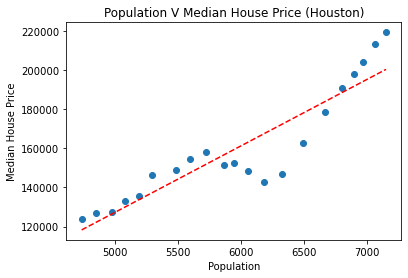

In [68]:
#Houston
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['HTNPOP'],pop_comp_df['Houston, TX'])
pri_fit = pri_slope * pop_comp_df['HTNPOP'] + pri_int

plt.scatter(pop_comp_df['HTNPOP'],pop_comp_df['Houston, TX'])
plt.title('Population V Median House Price (Houston)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['HTNPOP'],pri_fit,"--",color="red")
plt.show()

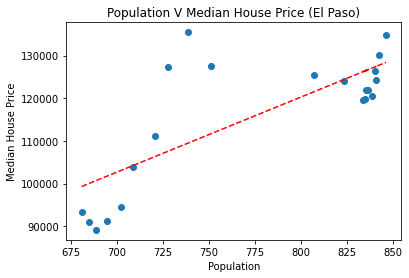

In [69]:
#El Paso
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['ELPPOP'],pop_comp_df['El Paso, TX'])
pri_fit = pri_slope * pop_comp_df['ELPPOP'] + pri_int

plt.scatter(pop_comp_df['ELPPOP'],pop_comp_df['El Paso, TX'])
plt.title('Population V Median House Price (El Paso)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['ELPPOP'],pri_fit,"--",color="red")
plt.show()

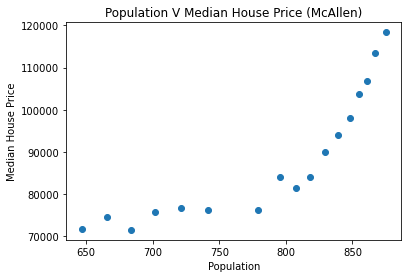

In [70]:
#McAllen
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['MCLPOP'],pop_comp_df['McAllen, TX'])
pri_fit = pri_slope * pop_comp_df['MCLPOP'] + pri_int

plt.scatter(pop_comp_df['MCLPOP'],pop_comp_df['McAllen, TX'])
plt.title('Population V Median House Price (McAllen)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['MCLPOP'],pri_fit,"--",color="red")
plt.show()

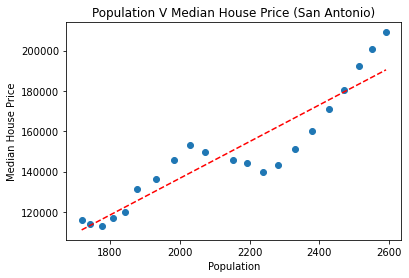

In [71]:
#San Antonio
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['SATPOP'],pop_comp_df['San Antonio, TX'])
pri_fit = pri_slope * pop_comp_df['SATPOP'] + pri_int

plt.scatter(pop_comp_df['SATPOP'],pop_comp_df['San Antonio, TX'])
plt.title('Population V Median House Price (San Antonio)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['SATPOP'],pri_fit,"--",color="red")
plt.show()